# Stochastic gradient descent (SGD)

<img src=".././photo/condition4.png" alt="photo" width="672" height="336">
<img src=".././photo/condition5.png" alt="photo" width="672" height="336">

In [16]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

x_train = [[1, x, x**2, np.cos(2*x), np.sin(2*x)] for x in coord_x]

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.array([0., 0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего

Qe = np.sum([(np.dot(w, x_train[i]) - coord_y[i]) ** 2 for i in range(sz)]) / sz # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(N):
    k = np.random.randint(0, sz)
    x_k = x_train[k]
    y_k = coord_y[k]
    loss_func = (np.dot(w, x_k) - y_k) ** 2 
    # SGD step
    diff_lf = 2 * np.dot((np.dot(w, x_k) - y_k), x_k) # lf - loss function
    w = w - eta * diff_lf
    # Qe recalculation
    Qe = lm * loss_func + (1 - lm) * Qe

Q = np.sum([(np.dot(w, x_train[i]) - coord_y[i]) ** 2 for i in range(sz)]) / sz
print(Q)
print(Qe)
print(w)

1.4323446928853572
1.8143849337851594
[-1.55870287 -0.77127223  0.28664769  0.8162054  -0.14011833]


# Same task

<img src=".././photo/condition6.png" alt="photo" width="672" height="336">
<img src=".././photo/condition7.png" alt="photo" width="672" height="336">

In [17]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5

coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

x_train = [[1, x, x ** 2, x ** 3] for x in coord_x]

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 50 # размер мини-батча (величина K = 50)

Qe = np.sum([(np.dot(w, x_train[i]) - coord_y[i]) ** 2 for i in range(batch_size)]) / (batch_size) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел 

for i in range(N):
    k = np.random.randint(0, sz - batch_size)
    arr_x_k = [x_train[j] for j in range(k, k + batch_size)]
    arr_y_k = [coord_y[j] for j in range(k, k + batch_size)]

    Qk = np.sum([(np.dot(w, x) - y) ** 2 for x, y in zip(arr_x_k, arr_y_k)]) / batch_size

    # it's (np.dot(w, x) - y) - a scalar, x - vector, if i use np.outer, x will be the vector (1, 4), but i need (4,) like following (np.array(x))
    diff_Qk = 2 * np.sum([(np.dot(w, x) - y) * np.array(x) for x, y in zip(arr_x_k, arr_y_k)], axis=0) / batch_size
    w = w - eta * diff_Qk
    
    Qe = lm * Qk + (1 - lm) * Qe

Q = np.sum([(np.dot(w, x_train[i]) - coord_y[i]) ** 2 for i in range(sz)]) / sz
print(Q)
print(Qe)
print(w)

0.02010989021755196
0.020450387266387284
[-2.49725214  0.49451654  0.19757031 -0.04967255]


# SGD for binary classification

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def loss(w, x, y):
    margin = np.dot(w, x) * y
    return 2 / (1 + np.exp(margin))

def df_loss(w, x, y):
    margin = np.dot(w, x) * y
    return (-2/(1 + np.exp(margin))**2) * np.exp(margin) * x * y

x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = np.array([x + [1] for x in x_train])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]) # {-1, +1}

n_train = len(x_train)
w = np.zeros(3)
nt = 0.0005 # convergence step
lm = 0.01 # forget speed for Q
N = 500

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
Q_plot = [Q] # for plot Q changing

for i in range(N):
    k = np.random.randint(0, n_train - 1)
    ek = loss(w, x_train[k], y_train[k]) # loss func calculation
    w = w - nt * df_loss(w, x_train[k], y_train[k])
    Q = lm * ek + (1 - lm) * Q
    Q_plot.append(Q)

print(w)
print(Q_plot)

[ 0.31130662 -0.17864896  0.00595288]
[1.0, 1.0, 0.996199440879765, 0.9903333927133606, 0.9957687879240633, 1.0003711373885773, 0.995252887133457, 0.9999434372431906, 1.0033357657679043, 1.0062869711551015, 1.0057191277147643, 1.006653501909908, 1.004516652783368, 1.0016794374129097, 1.0046817295684831, 1.0045533862882154, 1.0014909084383663, 1.0041318237250825, 1.0013167341957432, 1.0034508120811851, 0.9967647563874992, 0.9995842757939551, 1.0009430385190146, 1.000700224881117, 1.0012019379439554, 0.9963563342227438, 0.9898857140874873, 0.9921994825772006, 0.9937802423872262, 0.9875309358308518, 0.9901957416380707, 0.9854838410403381, 0.9872412780378614, 0.9854567358826463, 0.9807663272379651, 0.9726215685137697, 0.9660139409352156, 0.9585869152647434, 0.9498069210116356, 0.9425646832748432, 0.9337171040268701, 0.9393542627084255, 0.9459731577113071, 0.950996921844247, 0.9495222595218624, 0.9441147876253431, 0.9445237194832193, 0.9411978003889689, 0.9379335764372411, 0.936886526934412

<Axes: >

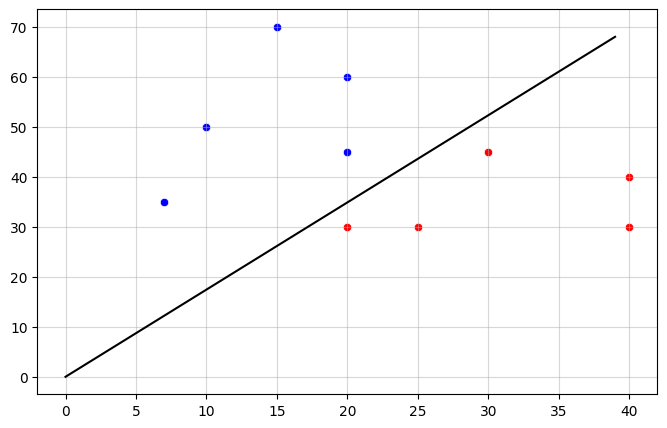

In [27]:
import seaborn as sns

X = list(range(max(x_train[:, 0])))
Y = [-w[0]/w[1] * x - w[2]/w[1] for x in X]

x_c1 = x_train[y_train == 1]
x_c2 = x_train[y_train == -1]

plt.figure(figsize=(8, 5))
sns.lineplot(x=X, y=Y, c='black')
plt.grid(True, alpha=0.5)
sns.scatterplot(x=x_c1[:, 0], y=x_c1[:, 1], c='red')
sns.scatterplot(x=x_c2[:, 0], y=x_c2[:, 1], c='blue')

<Axes: >

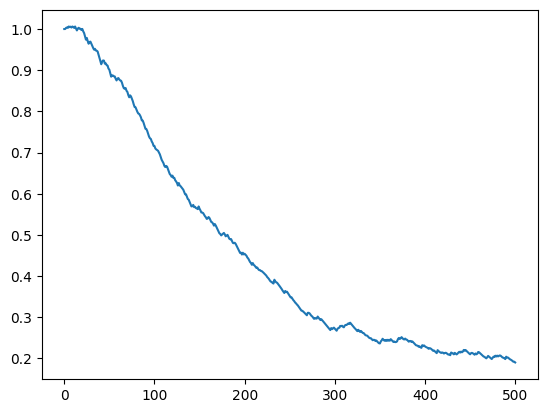

In [20]:
sns.lineplot(Q_plot)

In [2]:
import numpy as np

# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])   # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000  # число итераций алгоритма SGD

Qe = np.sum([(np.dot(w, x) * y) < 0 for x, y in zip(x_train, y_train)]) / n_train # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(N):
    k = np.random.randint(0, n_train - 1)
    w = w - nt * df(w, x_train[k], y_train[k])
    Qe = lm * loss(w, x_train[k], y_train[k]) + (1 - lm) * Qe

Q = np.sum([(np.dot(w, x) * y) < 0 for x, y in zip(x_train, y_train)]) / n_train 
print(w)
print(Q)
print(Qe)



[-8.15553401 -0.15656274  1.78240069]
0.07
0.3881691808668237


In [ ]:
import numpy as np


# экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.exp(-M)


# производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -np.exp(-M) * x.T * y


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)

Qe = np.sum([(np.dot(w, x) * y) < 0 for x, y in zip(x_train, y_train)]) / n_train # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(N):
    k = np.random.randint(0, n_train - batch_size - 1)
    Qk = []
    diff_Qk = []

    for j in range(k, k + batch_size):
        diff_Qk.append(df(w, x_train[j], y_train[j]))
        Qk.append(loss(w, x_train[j], y_train[j]))
    
    Qk = np.mean(Qk)
    # print(diff_Qk) # this is a list with the number of batch_size vectors with 3 coordinates [[1, 2, 3], [1, 2, 3]...]
    # so i need to use axis = 0
    # А если написать без axis=0:
    # то усреднится вообще всё подряд (и по объектам, и по координатам) → получится одно число, что не имеет смысла как градиент.
    diff_Qk = np.mean(diff_Qk, axis=0)
    w = w - nt * diff_Qk
    Qe = lm * Qk + (1 - lm) * Qe

Q = np.sum([(np.dot(w, x) * y) < 0 for x, y in zip(x_train, y_train)]) / n_train

print(w)
print(Q)
print(Qe)

[-3.99368023  0.34850649  1.07879392]
0.07
0.7027033228102062
